In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
dataset = pd.read_csv('Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
X = dataset.iloc[:,[3,4]].values # independant feature

In [10]:
# using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'wcss')

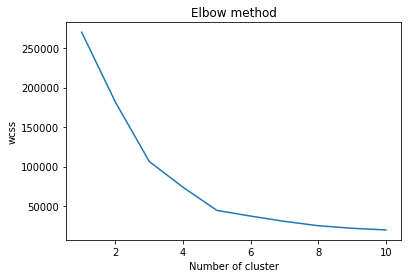

In [12]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init = 'k-means++')
    kmeans.fit_predict(X) # just going to assing the 
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('Number of cluster')
plt.ylabel('wcss')
    

In [15]:
KMeans(n_clusters=5,init='k-means++')
y_kmeans = kmeans.fit_predict(X)

In [16]:
y_kmeans

array([6, 2, 4, 2, 6, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 6, 2, 6, 2, 6, 2,
       4, 2, 4, 2, 6, 2, 6, 2, 4, 2, 4, 2, 4, 2, 4, 2, 6, 2, 6, 2, 6, 8,
       6, 8, 8, 8, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8, 0, 0, 8, 8, 8, 8,
       8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 9, 7, 0, 1, 9, 7, 9, 7,
       0, 7, 9, 1, 9, 7, 9, 7, 9, 1, 0, 1, 9, 1, 0, 7, 9, 1, 9, 1, 9, 7,
       9, 1, 9, 7, 9, 7, 0, 1, 9, 1, 9, 7, 9, 1, 9, 7, 9, 7, 9, 1, 9, 1,
       9, 7, 9, 1, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5])

In [19]:
kmeans.cluster_centers_

array([[ 63.57142857,  46.57142857],
       [ 79.26666667,  90.46666667],
       [ 25.0952381 ,  80.04761905],
       [109.7       ,  22.        ],
       [ 24.58333333,   9.58333333],
       [109.7       ,  82.        ],
       [ 30.        ,  34.61538462],
       [ 77.78571429,  73.28571429],
       [ 48.1       ,  52.675     ],
       [ 79.73913043,  13.39130435]])

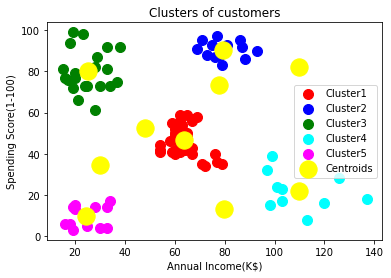

In [20]:
#Visualize the clusters

plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Cluster4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='magenta',label='Cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()